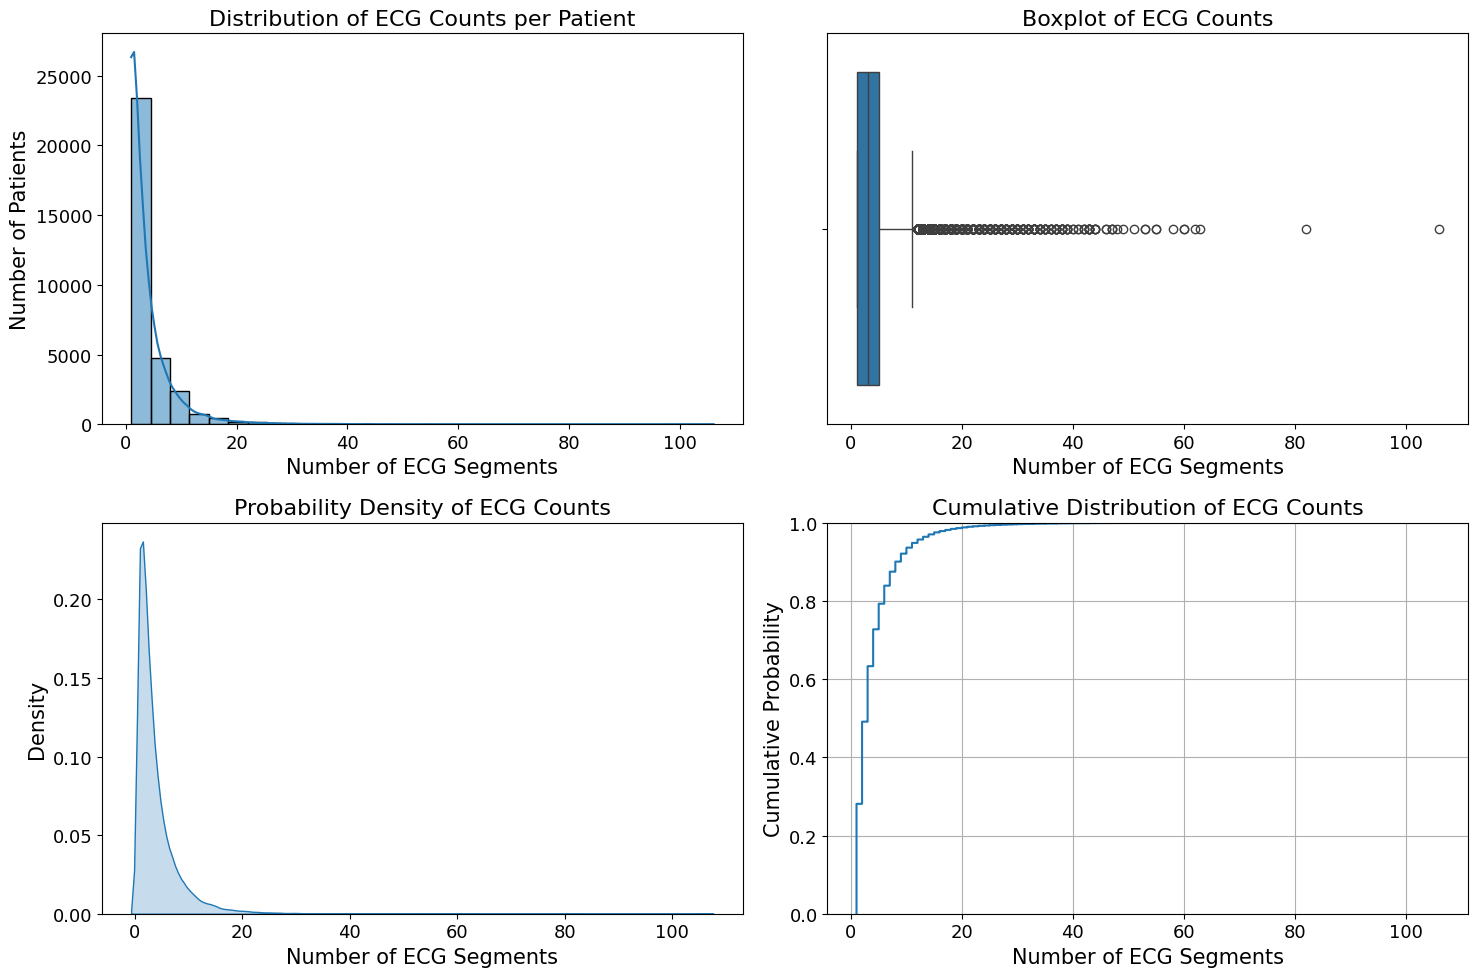


=== Descriptive Statistics ===
count    32176.000000
mean         3.954252
std          4.367503
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max        106.000000
Name: ecg_count, dtype: float64
Long term: 
32176 127232 39537
short term: 
25136 88326 28102

=== Top 10 Patients with Most ECG Segments ===
   subject_id  ecg_count
0    15910113        106
1    12468016         82
2    14923562         63
3    13752677         62
4    18965721         60
5    12043836         60
6    14539683         58
7    10670085         55
8    11296936         55
9    11326660         53

=== Top 10 Patients with Fewest ECG Segments ===
       subject_id  ecg_count
23129    10002930          1
23130    10009035          1
23131    10010867          1
23132    19988137          1
23133    19989126          1
23134    19989950          1
23135    19992425          1
23136    19992885          1
23137    19993726          1
23138    19994505          1


In [4]:
# 绘制每个病人的平均ecg数目

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. 加载数据
df = pd.read_csv('../../../data/combined_data/meta.csv')  # 替换为您的文件路径
df = df[df['nan_any']==False]
df = df[df['constant_leads_any']==False]

# 2. 统计每个subject_id的ECG数量
ecg_counts = df['subject_id'].value_counts().reset_index()
ecg_counts.columns = ['subject_id', 'ecg_count']

# 3. 绘制分布图
plt.figure(figsize=(15, 10))

# 直方图
plt.subplot(2, 2, 1)
sns.histplot(ecg_counts['ecg_count'], bins=30, kde=True)
plt.title('Distribution of ECG Counts per Patient')
plt.xlabel('Number of ECG Segments')
plt.ylabel('Number of Patients')

# 箱线图
plt.subplot(2, 2, 2)
sns.boxplot(x=ecg_counts['ecg_count'])
plt.title('Boxplot of ECG Counts')
plt.xlabel('Number of ECG Segments')

# 概率密度图
plt.subplot(2, 2, 3)
sns.kdeplot(ecg_counts['ecg_count'], fill=True)
plt.title('Probability Density of ECG Counts')
plt.xlabel('Number of ECG Segments')

# Q-Q图（检验正态性）
plt.subplot(2, 2, 4)
sns.ecdfplot(ecg_counts['ecg_count'])
plt.title('Cumulative Distribution of ECG Counts')
plt.xlabel('Number of ECG Segments')
plt.ylabel('Cumulative Probability')
plt.grid(True)

plt.tight_layout()
plt.show()

# 4. 打印统计信息
print("\n=== Descriptive Statistics ===")
print(ecg_counts['ecg_count'].describe())

print("Long term: ")
print(df['subject_id'].nunique(), df['ecg_idx'].nunique(), df['hadm_id'].nunique())

print("short term: ")
df_short = df[df["died_in_home"]==False]
print(df_short['subject_id'].nunique(), df_short['ecg_idx'].nunique(), df_short['hadm_id'].nunique())

print("\n=== Top 10 Patients with Most ECG Segments ===")
print(ecg_counts.nlargest(10, 'ecg_count'))

print("\n=== Top 10 Patients with Fewest ECG Segments ===")
print(ecg_counts.nsmallest(10, 'ecg_count'))

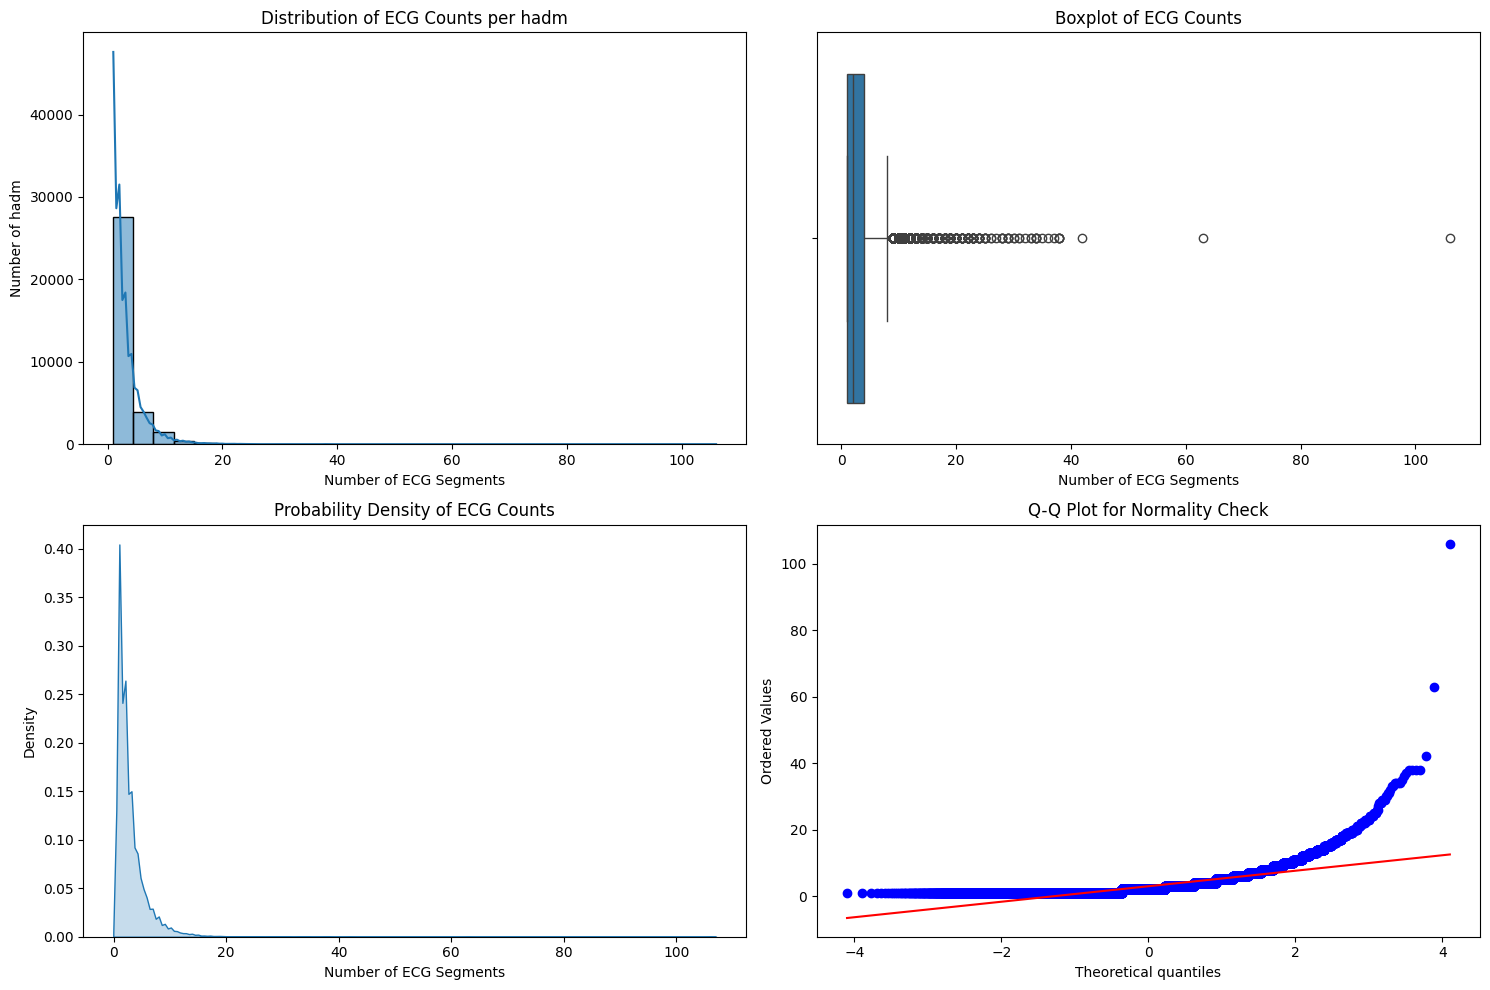


=== Descriptive Statistics ===
count    33633.000000
mean         2.969137
std          2.874496
min          1.000000
25%          1.000000
50%          2.000000
75%          4.000000
max        106.000000
Name: ecg_count, dtype: float64

=== Top 10 hadm with Most ECG Segments ===
      hadm_id  ecg_count
0  20133409.0        106
1  23365149.0         63
2  26360527.0         42
3  29334186.0         38
4  22962546.0         38
5  20422432.0         38
6  20581253.0         38
7  25747398.0         37
8  29794789.0         36
9  26357107.0         35

=== Top 10 hadm with Fewest ECG Segments ===
          hadm_id  ecg_count
21606  24530600.0          1
21607  23251352.0          1
21608  29242151.0          1
21609  29646384.0          1
21610  22942076.0          1
21611  24159665.0          1
21612  22168393.0          1
21613  20291550.0          1
21614  28324362.0          1
21615  23047799.0          1


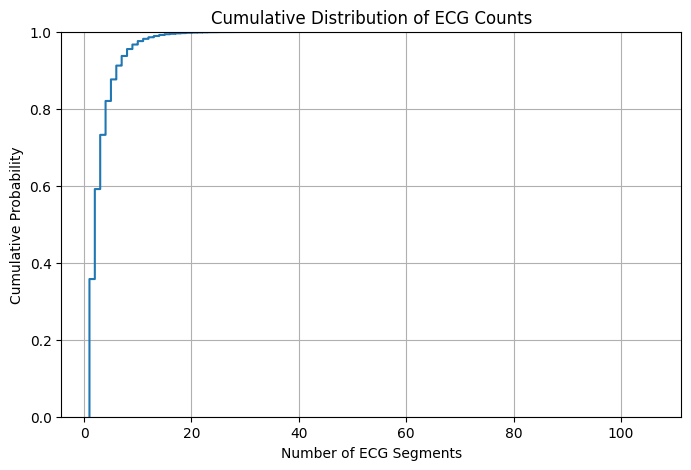

In [2]:
# 绘制每个病人的平均ecg数目

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. 加载数据
df = pd.read_csv('../../../data/filter_data_sur/final_records.csv')  # 替换为您的文件路径

# 2. 统计每个hadm_id的ECG数量
ecg_counts = df['hadm_id'].value_counts().reset_index()
ecg_counts.columns = ['hadm_id', 'ecg_count']

# 3. 绘制分布图
plt.figure(figsize=(15, 10))

# 直方图
plt.subplot(2, 2, 1)
sns.histplot(ecg_counts['ecg_count'], bins=30, kde=True)
plt.title('Distribution of ECG Counts per hadm')
plt.xlabel('Number of ECG Segments')
plt.ylabel('Number of hadm')

# 箱线图
plt.subplot(2, 2, 2)
sns.boxplot(x=ecg_counts['ecg_count'])
plt.title('Boxplot of ECG Counts')
plt.xlabel('Number of ECG Segments')

# 概率密度图
plt.subplot(2, 2, 3)
sns.kdeplot(ecg_counts['ecg_count'], fill=True)
plt.title('Probability Density of ECG Counts')
plt.xlabel('Number of ECG Segments')

# Q-Q图（检验正态性）
plt.subplot(2, 2, 4)
import scipy.stats as stats
stats.probplot(ecg_counts['ecg_count'], dist="norm", plot=plt)
plt.title('Q-Q Plot for Normality Check')

plt.tight_layout()
plt.show()

# 4. 打印统计信息
print("\n=== Descriptive Statistics ===")
print(ecg_counts['ecg_count'].describe())

print("\n=== Top 10 hadm with Most ECG Segments ===")
print(ecg_counts.nlargest(10, 'ecg_count'))

print("\n=== Top 10 hadm with Fewest ECG Segments ===")
print(ecg_counts.nsmallest(10, 'ecg_count'))


# 5. 绘制累积分布图（额外分析）
plt.figure(figsize=(8, 5))
sns.ecdfplot(ecg_counts['ecg_count'])
plt.title('Cumulative Distribution of ECG Counts')
plt.xlabel('Number of ECG Segments')
plt.ylabel('Cumulative Probability')
plt.grid(True)
plt.show()

In [3]:
import logging
logging.basicConfig(level = logging.INFO)

from typing import Callable, Dict, List, Optional
import os
import argparse

from importlib.util import find_spec

import wfdb

import numpy as np
import pandas as pd

from scipy.io import loadmat, savemat
from scipy.interpolate import interp1d

LEAD_ORDER = np.array(
    ['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6']
)
LEAD_TO_IND = {lead: lead_ind for lead_ind, lead in enumerate(LEAD_ORDER)}
IND_TO_LEAD = {lead_ind: lead for lead_ind, lead in enumerate(LEAD_ORDER)}
STDs = np.array([
    [0.12781512],
    [0.14941794],
    [0.12525026],
    [0.12572662],
    [0.10236586],
    [0.12168122],
    [0.1870286 ],
    [0.28818728],
    [0.29218111],
    [0.29028273],
    [0.26973001],
    [0.23605948],
])

FEMALE_VALUE = 1
MALE_VALUE = 0

def reorder_leads(feats: np.ndarray, sig_name: List[str], leads_to_load: pd.DataFrame):
    sig_name = np.array(sig_name)

    # If already identical, simply return feats as is
    if np.array_equal(leads_to_load.index, sig_name):
        return feats, leads_to_load.index.values.tolist()

    feats_order = leads_to_load.join(
        pd.Series(np.arange(len(sig_name)), index=sig_name, name='sample_order'),
        how='left',
    )

    lead_missing = feats_order['sample_order'].isna()

    # If no missing leads, simply re-order the leads
    if not lead_missing.any():
        feats = feats[feats_order['sample_order'].astype(int)]
        return feats, leads_to_load.index.values.tolist()

    # Otherwise, create a whole new array and fill in the available leads
    feats_new = np.full((len(leads_to_load), feats.shape[1]), np.nan)

    avail = feats_order[~lead_missing].astype(int)
    for _, row in avail.iterrows():
        feats_new[avail['global_order']] = feats[avail['sample_order']]

    return feats_new, lead_missing.index[~lead_missing].values.tolist()

def extract_feat_info(feats: np.ndarray, leads_to_load):
    fields = {}

    mean = feats.mean(axis=1, keepdims=True)
    fields['mean'] = mean.flatten()
    fields['std'] = np.std(feats, axis=1)

    nan = np.isnan(feats)
    nan_lead_sum = nan.sum(axis=1)
    print(nan_lead_sum)
    nan_leads = nan_lead_sum == feats.shape[1]
    fields['nan_any'] = nan_lead_sum.sum() > 0
    fields['nan_leads_any'] = nan_leads.any()
    fields["nan_leads"] = str(
        leads_to_load.index[nan_leads].to_list()
    )

    constant_leads = np.count_nonzero(feats - mean, axis=1) == 0
    fields['constant_leads_any'] = constant_leads.any()
    fields["constant_leads"] = str(
        leads_to_load.index[constant_leads].to_list()
    )

    return fields

def process_str_list_arg(text_lst):
    return pd.Series(text_lst).str.split(',').explode().str.strip()


feats, fields = wfdb.rdsamp('/ssd/housy/dataset/mimic-iv-ecg//files/p1007/p10078008/s40526289/40526289')

leads_to_load = process_str_list_arg("0,1,2,3,4,5,6,7,8,9,10,11").astype(int)
leads_to_load = leads_to_load.sort_values().drop_duplicates().map(IND_TO_LEAD)
leads_to_load = pd.DataFrame(
    {'global_order': np.arange(len(leads_to_load))},
    index=leads_to_load,
)

# Re-order leads to a selected standard order
feats = np.moveaxis(feats, 0, -1)
feats, avail_leads = reorder_leads(feats, fields["sig_name"], leads_to_load)

fields["avail_leads"] = str(avail_leads)
fields.update(extract_feat_info(feats, leads_to_load))

[   0    0    0    0    0    0 1093    0    0    0    0    0]


/tmp/ipykernel_162129/247984626.py:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  timebin_stats = df.groupby('time_bin').agg(


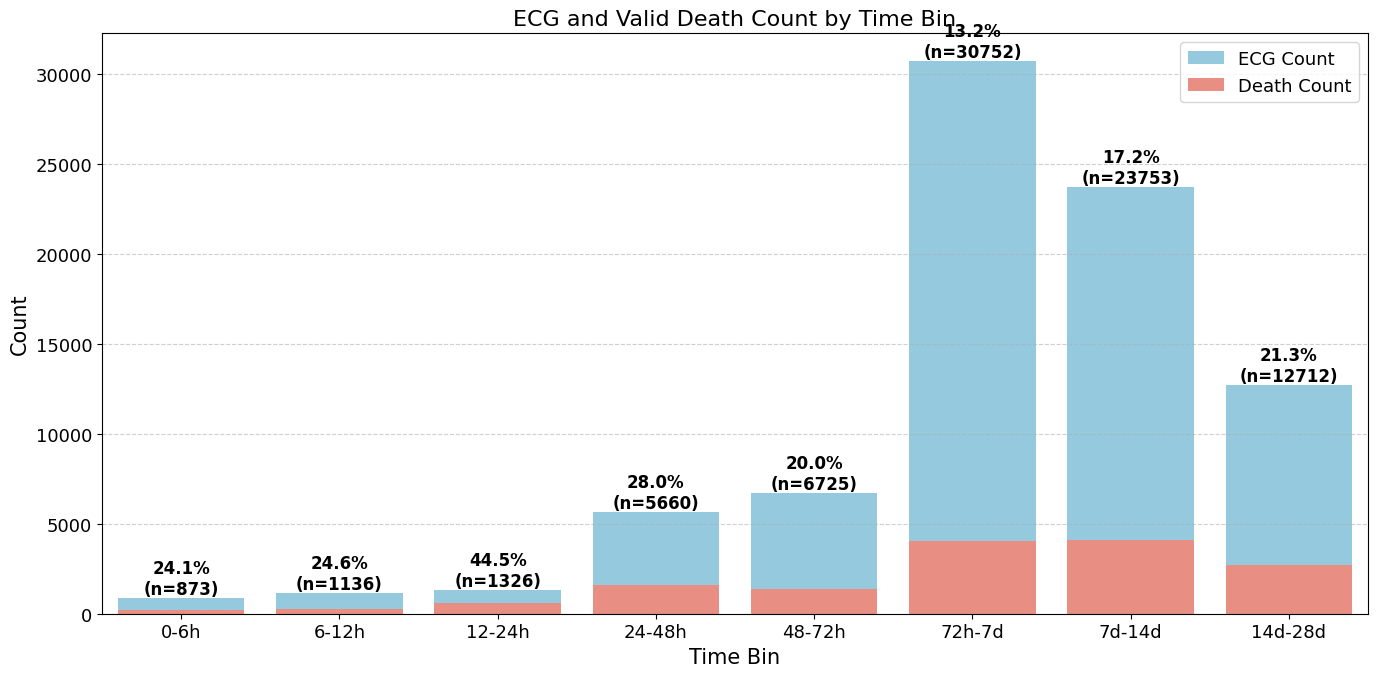

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 设置字体大小
plt.rcParams.update({
    'font.size': 14,
    'axes.titlesize': 16,
    'axes.labelsize': 15,
    'xtick.labelsize': 13,
    'ytick.labelsize': 13,
    'legend.fontsize': 13
})

# 读取数据
# df = pd.read_csv('../../../data/filter_data_sur/final_records.csv')
df = pd.read_csv('../../../data/combined_data/meta.csv')
df = df[df['nan_any']==False]
df = df[df['constant_leads_any']==False]
df = df[df["died_in_home"]==False]

# 新定义死亡：仅保留 event==1 且 delta_hours<672 的作为死亡记录
df['death'] = ((df['event'] == 1) & (df['delta_hours'] < 672)).astype(int)

# 自定义time_bin顺序
ordered_bins = ['0-6h', '6-12h', '12-24h', '24-48h', '48-72h', '72h-7d', '7d-14d', '14d-28d']
df['time_bin'] = pd.Categorical(df['time_bin'], categories=ordered_bins, ordered=True)

# 按time_bin统计
timebin_stats = df.groupby('time_bin').agg(
    ecg_count=('event', 'count'),
    death_count=('death', 'sum')
).reset_index()

timebin_stats['death_rate'] = timebin_stats['death_count'] / timebin_stats['ecg_count']

# 绘图
plt.figure(figsize=(14, 7))
barplot = sns.barplot(data=timebin_stats, x='time_bin', y='ecg_count', color='skyblue', label='ECG Count')
sns.barplot(data=timebin_stats, x='time_bin', y='death_count', color='salmon', label='Death Count')

# 文本标注：在柱顶部加死亡率和样本量
for bar, (_, row) in zip(barplot.patches[:len(timebin_stats)], timebin_stats.iterrows()):
    height = bar.get_height()
    x = bar.get_x() + bar.get_width() / 2
    total = int(row['ecg_count'])
    rate = row['death_rate']
    barplot.text(x, height + 5, f'{rate:.1%}\n(n={total})', ha='center', va='bottom', fontsize=12, weight='bold')

# 美化
plt.title('ECG and Valid Death Count by Time Bin')
plt.xlabel('Time Bin')
plt.ylabel('Count')
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


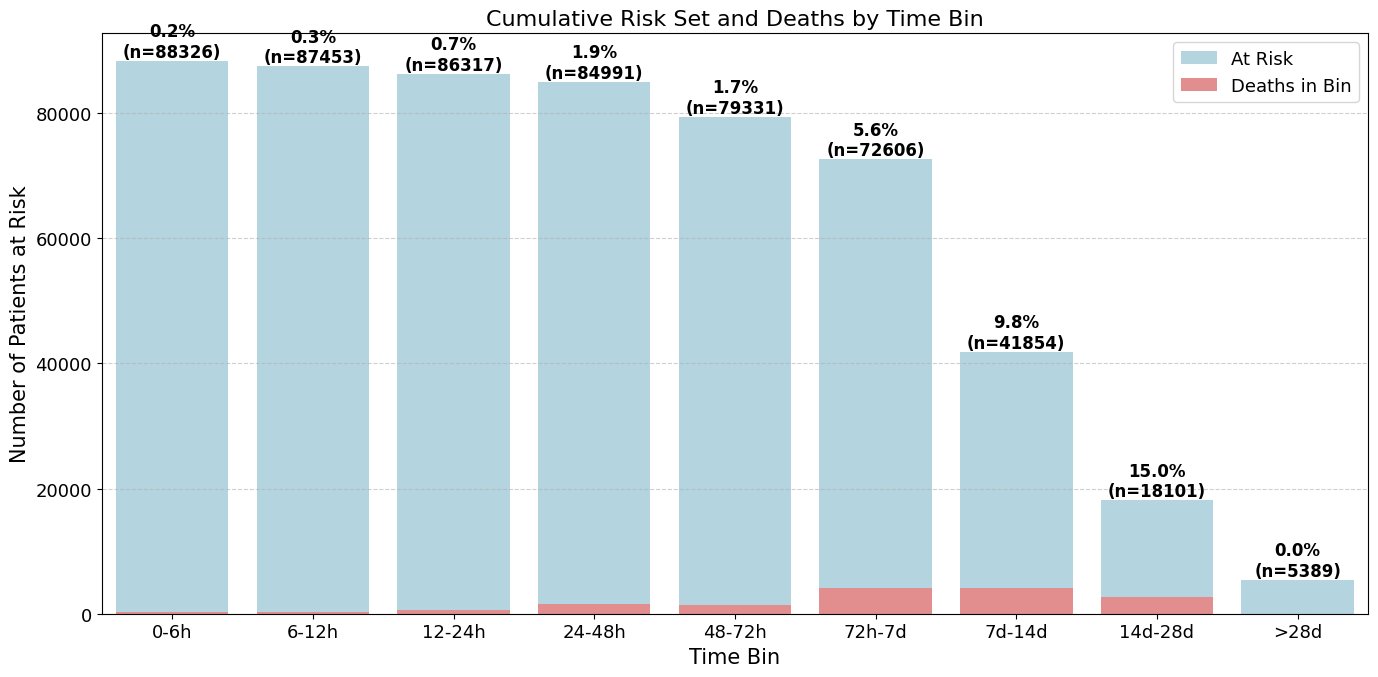

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 设置全局字体大小
plt.rcParams.update({
    'font.size': 14,
    'axes.titlesize': 16,
    'axes.labelsize': 15,
    'xtick.labelsize': 13,
    'ytick.labelsize': 13,
    'legend.fontsize': 13
})

# 读取数据
# df = pd.read_csv('../../../data/filter_data_sur/final_records.csv')
df = pd.read_csv('../../../data/combined_data/meta.csv')
df = df[df['nan_any']==False]
df = df[df['constant_leads_any']==False]
df = df[df["died_in_home"]==False]

# 新定义死亡：event==1 且 delta_hours < 672
df['death'] = ((df['event'] == 1) & (df['delta_hours'] < 672)).astype(int)

# 替换 NaN 为 '>28d'，表示落在所有 bin 之后
df['time_bin_filled'] = df['time_bin'].fillna('>28d')

# 定义 time_bin 顺序
ordered_bins = ['0-6h', '6-12h', '12-24h', '24-48h', '48-72h', '72h-7d', '7d-14d', '14d-28d', '>28d']
df['time_bin_filled'] = pd.Categorical(df['time_bin_filled'], categories=ordered_bins, ordered=True)

stats = []

for i, bin_label in enumerate(ordered_bins):
    death_count = df[(df['death'] == 1) & (df['time_bin_filled'] == bin_label)].shape[0]
    
    # 判断当前 time_bin_filled 是否在当前 bin 或之后
    def is_in_risk_pool(x):
        if x == '>28d':
            return True
        try:
            return ordered_bins.index(x) >= i
        except ValueError:
            return False  # 非法的 bin 值，不算进去
    
    risk_pool = df[df['time_bin_filled'].apply(is_in_risk_pool)]
    risk_count = risk_pool.shape[0]
    
    stats.append({
        'time_bin': bin_label,
        'risk_count': risk_count,
        'death_count': death_count,
        'death_rate': death_count / risk_count if risk_count > 0 else 0
    })


stats_df = pd.DataFrame(stats)

# 绘图
plt.figure(figsize=(14, 7))
barplot = sns.barplot(data=stats_df, x='time_bin', y='risk_count', color='lightblue', label='At Risk')
sns.barplot(data=stats_df, x='time_bin', y='death_count', color='lightcoral', label='Deaths in Bin')

# 添加文本标注：死亡率和总人数
for bar, (_, row) in zip(barplot.patches[:len(stats_df)], stats_df.iterrows()):
    height = bar.get_height()
    x = bar.get_x() + bar.get_width() / 2
    rate = row['death_rate']
    total = int(row['risk_count'])
    barplot.text(x, height + 5, f'{rate:.1%}\n(n={total})', ha='center', va='bottom', fontsize=12, weight='bold')

# 图形美化
plt.title('Cumulative Risk Set and Deaths by Time Bin')
plt.xlabel('Time Bin')
plt.ylabel('Number of Patients at Risk')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


/tmp/ipykernel_162129/2772697720.py:35: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  timebin_stats = df.groupby('custom_time_bin').agg(


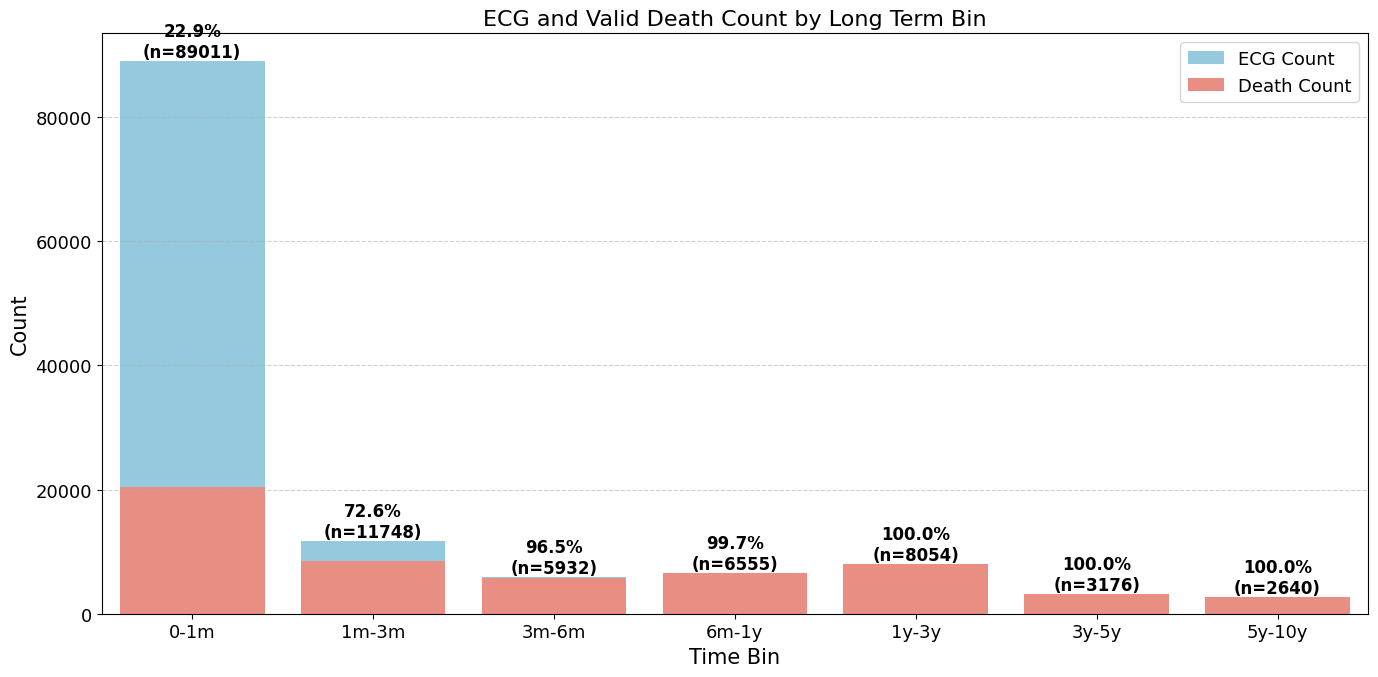

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 设置字体大小
plt.rcParams.update({
    'font.size': 14,
    'axes.titlesize': 16,
    'axes.labelsize': 15,
    'xtick.labelsize': 13,
    'ytick.labelsize': 13,
    'legend.fontsize': 13
})

# 读取数据
# df = pd.read_csv('../../../data/filter_data_sur/final_records.csv')
df = pd.read_csv('../../../data/combined_data/meta.csv')
df = df[df['nan_any']==False]
df = df[df['constant_leads_any']==False]

# 新定义死亡：仅保留 event==1 且 delta_hours<672 的作为死亡记录
df['death'] = ((df['event'] == 1)).astype(int)

# 自定义时间区间和标签（单位：小时）
time_bins = [0, 720, 2160, 4320, 8640, 25920, 43200, 86400]  # 小时为单位
time_labels = ['0-1m', '1m-3m', '3m-6m', '6m-1y', '1y-3y', '3y-5y', '5y-10y']

# 使用 pd.cut 将 delta_hours 分到区间中
df['custom_time_bin'] = pd.cut(df['delta_hours'], bins=time_bins, labels=time_labels, right=False)

# 设置时间段为有序分类变量
df['custom_time_bin'] = pd.Categorical(df['custom_time_bin'], categories=time_labels, ordered=True)

# 按自定义时间段统计
timebin_stats = df.groupby('custom_time_bin').agg(
    ecg_count=('event', 'count'),
    death_count=('death', 'sum')
).reset_index()

timebin_stats['death_rate'] = timebin_stats['death_count'] / timebin_stats['ecg_count']

# 绘图
plt.figure(figsize=(14, 7))
barplot = sns.barplot(data=timebin_stats, x='custom_time_bin', y='ecg_count', color='skyblue', label='ECG Count')
sns.barplot(data=timebin_stats, x='custom_time_bin', y='death_count', color='salmon', label='Death Count')

# 文本标注：在柱顶部加死亡率和样本量
for bar, (_, row) in zip(barplot.patches[:len(timebin_stats)], timebin_stats.iterrows()):
    height = bar.get_height()
    x = bar.get_x() + bar.get_width() / 2
    total = int(row['ecg_count'])
    rate = row['death_rate']
    barplot.text(x, height + 5, f'{rate:.1%}\n(n={total})', ha='center', va='bottom', fontsize=12, weight='bold')

# 美化
plt.title('ECG and Valid Death Count by Long Term Bin')
plt.xlabel('Time Bin')
plt.ylabel('Count')
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

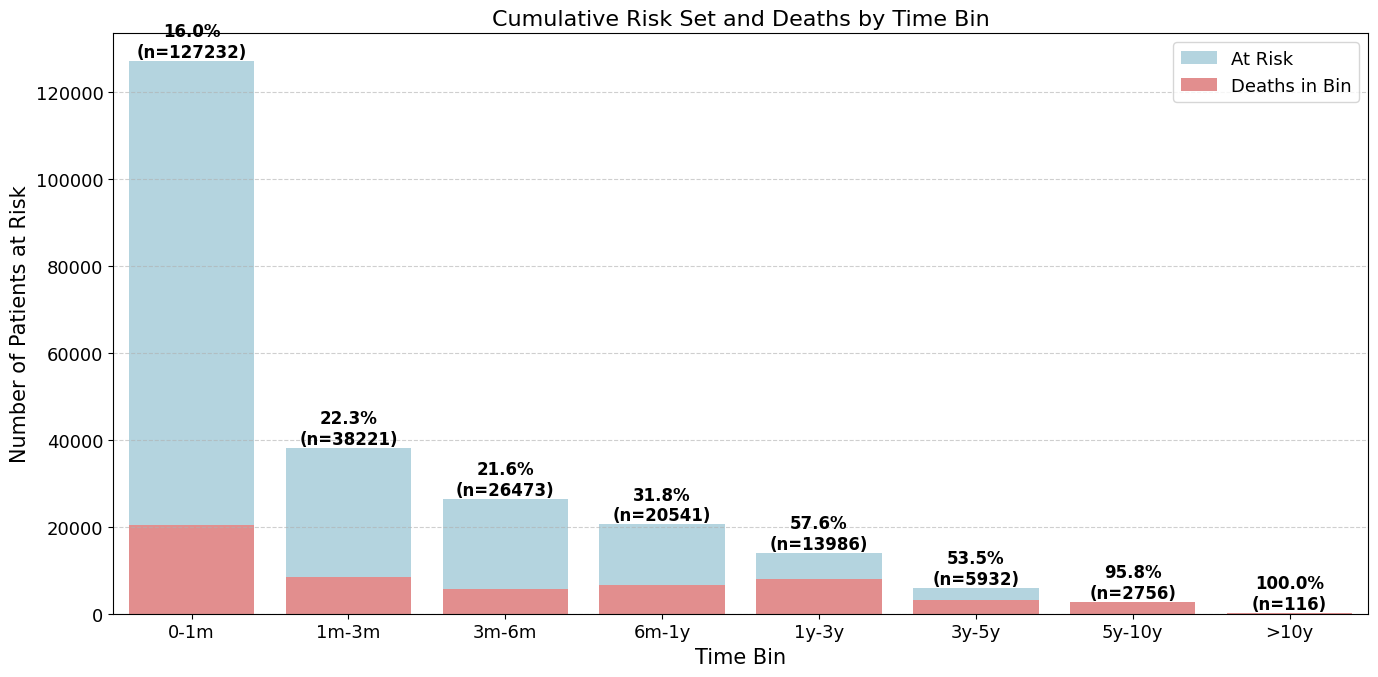

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 设置全局字体大小
plt.rcParams.update({
    'font.size': 14,
    'axes.titlesize': 16,
    'axes.labelsize': 15,
    'xtick.labelsize': 13,
    'ytick.labelsize': 13,
    'legend.fontsize': 13
})

# 读取数据
df = pd.read_csv('../../../data/combined_data/meta.csv')
df = df[df['nan_any']==False]
df = df[df['constant_leads_any']==False]

df['death'] = ((df['event'] == 1)).astype(int)

# 定义时间区间和标签
time_bins = [0, 720, 2160, 4320, 8640, 25920, 43200, 86400]
time_labels = ['0-1m', '1m-3m', '3m-6m', '6m-1y', '1y-3y', '3y-5y', '5y-10y']

# 将 delta_hours 映射为新的 time_bin
df['time_bin_filled'] = pd.cut(df['delta_hours'], bins=time_bins, labels=time_labels, right=False)
df['time_bin_filled'] = df['time_bin_filled'].cat.add_categories(['>10y']).fillna('>10y')

# 设置有序分类
ordered_bins = time_labels + ['>10y']
df['time_bin_filled'] = pd.Categorical(df['time_bin_filled'], categories=ordered_bins, ordered=True)

# 统计逻辑
stats = []

for i, bin_label in enumerate(ordered_bins):
    # 当前时间段内的死亡人数
    death_count = df[(df['death'] == 1) & (df['time_bin_filled'] == bin_label)].shape[0]
    
    # 定义当前及之后都属于风险集
    def is_in_risk_pool(x):
        if x == '>10y':
            return True
        try:
            return ordered_bins.index(x) >= i
        except ValueError:
            return False

    risk_pool = df[df['time_bin_filled'].apply(is_in_risk_pool)]
    risk_count = risk_pool.shape[0]
    
    stats.append({
        'time_bin': bin_label,
        'risk_count': risk_count,
        'death_count': death_count,
        'death_rate': death_count / risk_count if risk_count > 0 else 0
    })

# 转为 DataFrame
stats_df = pd.DataFrame(stats)

# 绘图
plt.figure(figsize=(14, 7))
barplot = sns.barplot(data=stats_df, x='time_bin', y='risk_count', color='lightblue', label='At Risk')
sns.barplot(data=stats_df, x='time_bin', y='death_count', color='lightcoral', label='Deaths in Bin')

# 添加标注
for bar, (_, row) in zip(barplot.patches[:len(stats_df)], stats_df.iterrows()):
    height = bar.get_height()
    x = bar.get_x() + bar.get_width() / 2
    rate = row['death_rate']
    total = int(row['risk_count'])
    barplot.text(x, height + 5, f'{rate:.1%}\n(n={total})', ha='center', va='bottom', fontsize=12, weight='bold')

# 美化图表
plt.title('Cumulative Risk Set and Deaths by Time Bin')
plt.xlabel('Time Bin')
plt.ylabel('Number of Patients at Risk')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
